In [146]:
# Load Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [147]:
# Load Dataset

df = pd.read_csv("/content/Customer Behaviour.csv")

In [148]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,$53.00,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,$64.00,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,$73.00,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,$90.00,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,$49.00,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
# Data Cleaning
# check for missing values
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Color,0
Season,0
Review Rating,0


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   object 
 6   Location                3900 non-null   object 
 7   Color                   3900 non-null   object 
 8   Season                  3900 non-null   object 
 9   Review Rating           3900 non-null   float64
 10  Subscription Status     3900 non-null   object 
 11  Shipping Type           3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Promo Code Used         3900 non-null   object 
 14  Previous Purchases      3900 non-null   

In [7]:
df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].replace('[\$,]', '', regex=True).astype(float)

In [8]:
df.drop(columns='Frequency of Purchases',inplace = True)

In [9]:
df['Discount Applied'] = df['Discount Applied'].map({'Yes': 1, 'No': 0})
df['Promo Code Used'] = df['Promo Code Used'].map({'Yes': 1, 'No': 0})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer ID            3900 non-null   int64  
 1   Age                    3900 non-null   int64  
 2   Gender                 3900 non-null   object 
 3   Item Purchased         3900 non-null   object 
 4   Category               3900 non-null   object 
 5   Purchase Amount (USD)  3900 non-null   float64
 6   Location               3900 non-null   object 
 7   Color                  3900 non-null   object 
 8   Season                 3900 non-null   object 
 9   Review Rating          3900 non-null   float64
 10  Subscription Status    3900 non-null   object 
 11  Shipping Type          3900 non-null   object 
 12  Discount Applied       3900 non-null   int64  
 13  Promo Code Used        3900 non-null   int64  
 14  Previous Purchases     3900 non-null   int64  
 15  Paym

In [11]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Previous Purchases', 'Payment Method'],
      dtype='object')

In [12]:
df.shape

(3900, 16)

In [13]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Discount Applied,Promo Code Used,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,0.430000,0.430000,25.351538
std,1125.977353,15.207589,23.685392,0.716223,0.495139,0.495139,14.447125
min,1.000000,18.000000,20.000000,2.500000,0.000000,0.000000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,0.000000,0.000000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,0.000000,0.000000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,1.000000,1.000000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,1.000000,1.000000,50.000000


In [14]:
# Feature Engineering
customer_df = df.groupby('Customer ID').agg({
    'Purchase Amount (USD)': 'sum',
    'Age': 'mean',
    'Discount Applied' : 'mean',
    'Promo Code Used' : 'mean',
    'Previous Purchases' : 'max',
    'Review Rating' : 'mean'

}).reset_index()

In [15]:
customer_df.rename(columns={
    'Purchase Amount (USD)': 'total_spend',
    'Previous Purchases': 'previous_purchases',
    'Discount Applied': 'discount_usage_rate',
    'Promo Code Used': 'promo_usage_rate',
    'Review Rating': 'avg_rating'
}, inplace=True)

In [16]:
# Average Order Value
customer_df['aov'] = customer_df['total_spend']/customer_df['previous_purchases']

In [17]:
customer_df.head()

,Customer ID,total_spend,Age,discount_usage_rate,promo_usage_rate,previous_purchases,avg_rating,aov
0,1,53.0,55.0,1.0,1.0,14,3.1,3.785714
1,2,64.0,19.0,1.0,1.0,2,3.1,32.000000
2,3,73.0,50.0,1.0,1.0,23,3.1,3.173913
3,4,90.0,21.0,1.0,1.0,49,3.5,1.836735
4,5,49.0,45.0,1.0,1.0,31,2.7,1.580645


In [100]:
features = customer_df[['total_spend', 'previous_purchases', 'avg_rating',
               'discount_usage_rate', 'promo_usage_rate','Age']]

In [93]:
features.isnull().sum()

,0
total_spend,0
previous_purchases,0
avg_rating,0
discount_usage_rate,0
promo_usage_rate,0
aov,0
Age,0


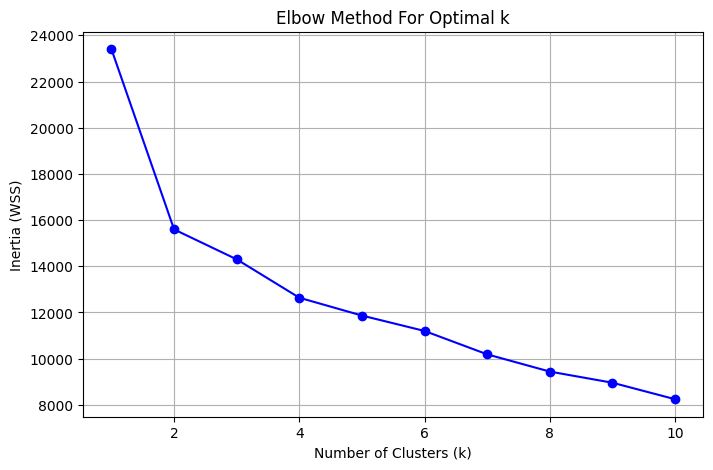

In [144]:
# Elbow Method for K

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)  # Within-cluster sum of squares

# Plot
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WSS)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [145]:
plt.savefig("elbow_chart.png")

<Figure size 640x480 with 0 Axes>

In [98]:
df_cluster = customer_df[features].copy()
df_cluster = df_cluster.apply(pd.to_numeric, errors='coerce').dropna()

In [113]:
df_cluster.head()

,total_spend,avg_rating,previous_purchases,discount_usage_rate,promo_usage_rate,aov,Age
0,53.0,3.1,14,1.0,1.0,3.785714,55.0
1,64.0,3.1,2,1.0,1.0,32.000000,19.0
2,73.0,3.1,23,1.0,1.0,3.173913,50.0
3,90.0,3.5,49,1.0,1.0,1.836735,21.0
4,49.0,2.7,31,1.0,1.0,1.580645,45.0


In [102]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [103]:
# Apply KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [123]:
customer_df['cluster'] = clusters

In [117]:
clusters

array([2, 2, 2, ..., 1, 1, 3], dtype=int32)

In [107]:
df['cluster'].value_counts()
df.groupby('cluster')[['Age', 'Review Rating', 'Discount Applied', 'Promo Code Used']].mean()

,Age,Review Rating,Discount Applied,Promo Code Used
cluster,,,,
0,45.075206,4.345123,1.0,1.0
1,42.722426,3.718566,0.0,0.0
2,43.186441,3.115860,1.0,1.0
3,45.245815,3.795242,0.0,0.0


from matplotlib import pyplot as plt
_df_0['cluster'].plot(kind='hist', bins=20, title='cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Review Rating'].plot(kind='hist', bins=20, title='Review Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Discount Applied'].plot(kind='hist', bins=20, title='Discount Applied')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='cluster', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Age', y='Review Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Review Rating', y='Discount Applied', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Discount Applied', y='Promo Code Used', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cluster']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('cluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cluster']
  ys = series['Review Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('cluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster')
_ = plt.ylabel('Review Rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cluster']
  ys = series['Discount Applied']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('cluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster')
_ = plt.ylabel('Discount Applied')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cluster']
  ys = series['Promo Code Used']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('cluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster')
_ = plt.ylabel('Promo Code Used')

from matplotlib import pyplot as plt
_df_12['cluster'].plot(kind='line', figsize=(8, 4), title='cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Review Rating'].plot(kind='line', figsize=(8, 4), title='Review Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Discount Applied'].plot(kind='line', figsize=(8, 4), title='Discount Applied')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
'''Segment 0: Loyal Deal Seekers
Always use promo codes and discounts

Rate highly (most satisfied group)

Could respond well to email-based discount campaigns

🔹 Segment 1: Independent Spenders
Don’t care about promotions

Average ratings

May value product quality or brand loyalty

🔹 Segment 2: Price-Sensitive but Less Happy
Use all available offers, but give the lowest ratings

Indicates a gap between expectations vs. delivered value

Opportunity: Improve product quality or transparency for discount users

🔹 Segment 3: Premium Buyers
Older buyers, not influenced by offers

Still satisfied — possibly high-value, premium loyal segment

Offer exclusive experiences instead of discounts'''

In [127]:
features_new = [
    'Age', 'avg_rating',
    'discount_usage_rate', 'promo_usage_rate',
    'total_spend', 'previous_purchases', 'cluster'
]
X = customer_df[features_new]
y = df[target_column]

In [128]:
X = X.apply(pd.to_numeric, errors='coerce')
X.dropna(inplace=True)
y = y.loc[X.index]

In [129]:
#Predictive Modeling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression RMSE:", rmse)
print("Linear Regression R² Score:", r2)

Linear Regression RMSE: 0.29642598507711865
Linear Regression R² Score: 0.8556324554467952


In [134]:
lrm = LinearRegression()
lrm.fit(X,y)

LinearRegression()

In [135]:
print(X)

       Age  avg_rating  discount_usage_rate  promo_usage_rate  total_spend  \
0     55.0         3.1                  1.0               1.0         53.0   
1     19.0         3.1                  1.0               1.0         64.0   
2     50.0         3.1                  1.0               1.0         73.0   
3     21.0         3.5                  1.0               1.0         90.0   
4     45.0         2.7                  1.0               1.0         49.0   
...    ...         ...                  ...               ...          ...   
3895  40.0         4.2                  0.0               0.0         28.0   
3896  52.0         4.5                  0.0               0.0         49.0   
3897  46.0         2.9                  0.0               0.0         33.0   
3898  44.0         3.8                  0.0               0.0         77.0   
3899  52.0         3.1                  0.0               0.0         81.0   

      previous_purchases  cluster  
0                     14   